In [39]:
def check_smiles(smile):
    bracket_count = 0
    cycle_count = 0
    for x in smile:
        if x == "(":
            bracket_count+=1
        if x == ")":
            bracket_count-=1
        if x.isnumeric():
            x = int(x)
            cycle_count += x
            
    if bracket_count != 0:
        print("Вложенные структуры не закрыты")
        assert 1
    if  cycle_count//2 == 1:
        print("Циклическая структура не закрыта")
        assert 1
    else:
        return smile


check_smiles("CCCC")

'CCCC'

In [53]:
class atom:
    
    def __init__(self, symbol, index = 0, connected_atoms = [], bond_type = []):
        
        charge_lib = {
                "C": 6,
                "H": 1,
                "N": 7,
                "O": 8}
                
        self.symbol = symbol.upper()
        self.charge = charge_lib[symbol]
        self.index = index
        self.bond_type = bond_type
        self.connected_atoms = connected_atoms

    def print(self):
        
        print(self.symbol, self.charge, self.connected_atoms, self.bond_type)
       
    def takePlaceInMatrix(self, matrix):
        
        matrix[self.index][self.index] = self.charge
        for j in self.connected_atoms:
            matrix[self.index][j] = self.bond_type[j-1]
            matrix[j][self.index] = self.bond_type[j-1]
        
        return matrix



In [31]:
C1 = atom("C", 0, [1], [5])
C2 = atom("C", 1, [0,2], [5,5])
C3 = atom("C", 2, [1], [5])
atoms = [C1, C2, C3]


def draw_matrix(atoms):
    
    def print_matrix(matrix):
        for i in matrix:
            for j in i:
                print(j, end = " ")
            print()
    
    N = len(atoms)
    matrix = [[0 for i in range(N)] for i in range(N)]
    
    for x in atoms:
        matrix = x.takePlaceInMatrix(matrix)
    print_matrix(matrix)
    #return matrix
        
        
draw_matrix(atoms)

6 5 0 
5 6 5 
0 5 6 


In [61]:
def read_smiles(smiles):
    
    smiles = check_smiles(smiles)
    #smiles = smiles.upper()
    
    index = 0
    atoms = []
    for i in range(len(smiles)):
        x = smiles[i]
        if isinstance(x, str):
            
            if index == 0:
                A = atom(x, index, [1], [1])
                atoms.append(A)
                A.print()
            elif index == len(smiles)-1:
                A = atom(x, index, [len(smiles) - 1], [1])
                atoms.append(A)
                A.print()
            else:
                A = atom(x, index, [index-1,index+1], [1,1])
                atoms.append(A)
                A.print()
                
            index += 1
        
    return atoms
    
atoms = read_smiles("CCCCC")
draw_matrix(atoms)

C 6 [1] [1]
0
C 6 [0, 2] [1, 1]
1
C 6 [1, 3] [1, 1]
2
C 6 [2, 4] [1, 1]
3
C 6 [4] [1]
4


IndexError: list index out of range

5 5 5
[[-5.0, 2.0, -5.0], [-5.0, 2.0, -3.0], [-5.0, 2.0, -1.0], [-5.0, 2.0, 1.0], [-5.0, 2.0, 3.0], [-5.0, -4.0, -5.0], [-5.0, -4.0, -3.0], [-5.0, -4.0, -1.0], [-5.0, -4.0, 1.0], [-5.0, -4.0, 3.0], [-5.0, -2.0, -5.0], [-5.0, -2.0, -3.0], [-5.0, -2.0, -1.0], [-5.0, -2.0, 1.0], [-5.0, -2.0, 3.0], [-5.0, 0.0, -5.0], [-5.0, 0.0, -3.0], [-5.0, 0.0, -1.0], [-5.0, 0.0, 1.0], [-5.0, 0.0, 3.0], [-5.0, 2.0, -5.0], [-5.0, 2.0, -3.0], [-5.0, 2.0, -1.0], [-5.0, 2.0, 1.0], [-5.0, 2.0, 3.0], [-3.0, 2.0, -5.0], [-3.0, 2.0, -3.0], [-3.0, 2.0, -1.0], [-3.0, 2.0, 1.0], [-3.0, 2.0, 3.0], [-3.0, -4.0, -5.0], [-3.0, -4.0, -3.0], [-3.0, -4.0, -1.0], [-3.0, -4.0, 1.0], [-3.0, -4.0, 3.0], [-3.0, -2.0, -5.0], [-3.0, -2.0, -3.0], [-3.0, -2.0, -1.0], [-3.0, -2.0, 1.0], [-3.0, -2.0, 3.0], [-3.0, 0.0, -5.0], [-3.0, 0.0, -3.0], [-3.0, 0.0, -1.0], [-3.0, 0.0, 1.0], [-3.0, 0.0, 3.0], [-3.0, 2.0, -5.0], [-3.0, 2.0, -3.0], [-3.0, 2.0, -1.0], [-3.0, 2.0, 1.0], [-3.0, 2.0, 3.0], [-1.0, 2.0, -5.0], [-1.0, 2.0, -3.0], [-1.0

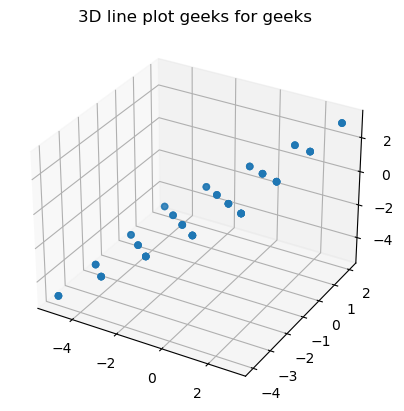

In [66]:
import numpy as np
import matplotlib.pyplot as plt

size = 10
a0 = 2

N = int(size/a0)
x = np.arange(-size/2, size/2, a0)
y = np.arange(-size/2+a0/2, size/2-a0/2, a0)
z = np.arange(-size/2, size/2, a0)
x, y, z = np.meshgrid(x, y, z, indexing='ij')

print(len(x),len(y),len(z))
coord = []

for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            coord.append([x[i,j-1,k],y[i,j-1,k], z[i,j-1,k]])
            
print(coord)

ax = plt.axes(projection ='3d')

#ax.scatter(coord[0], coord[1], coord[2], 'green')

ax.scatter(z, y, z, 'green')
ax.set_title('3D line plot geeks for geeks')
plt.show()


In [58]:
print(x)

[[[-5. -5. -5. -5. -5.]
  [-5. -5. -5. -5. -5.]
  [-5. -5. -5. -5. -5.]
  [-5. -5. -5. -5. -5.]]

 [[-3. -3. -3. -3. -3.]
  [-3. -3. -3. -3. -3.]
  [-3. -3. -3. -3. -3.]
  [-3. -3. -3. -3. -3.]]

 [[-1. -1. -1. -1. -1.]
  [-1. -1. -1. -1. -1.]
  [-1. -1. -1. -1. -1.]
  [-1. -1. -1. -1. -1.]]

 [[ 1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.]]

 [[ 3.  3.  3.  3.  3.]
  [ 3.  3.  3.  3.  3.]
  [ 3.  3.  3.  3.  3.]
  [ 3.  3.  3.  3.  3.]]]
